In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

In [2]:
data = pd.read_excel('26.4 Когортный анализ.xlsx')
data.head(), data.shape

(  user_id       date  price
 0   A0005 2020-03-25     50
 1   A0005 2020-03-25     40
 2   A0005 2020-03-26     70
 3   A0005 2020-03-27     20
 4   A0005 2020-03-29     50,
 (704840, 3))

In [3]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [4]:
data['month_year'] = data['date'].apply(get_month)
data.head()

,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01


In [5]:
data['cohortMonth'] = data.groupby('user_id')['month_year'].transform('min')
data.head()

,user_id,date,price,month_year,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01


In [6]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [7]:
date_year, date_month, _ = get_date(data, 'date')                                

In [8]:
cohort_year, cohort_month, _ = get_date(data, 'cohortMonth')

In [9]:
year_diff = date_year - cohort_year

In [10]:
month_diff = date_month - cohort_month

In [11]:
data['cohort_index'] = year_diff * 12 + month_diff + 1
data.head()

,user_id,date,price,month_year,cohortMonth,cohort_index
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1


In [12]:
data['cohort_index'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 12, 10,  9, 11, 13, 14],
      dtype=int64)

In [13]:
data1 = data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=lambda x: len(x.unique()))

In [14]:
data1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1210.0,455.0,264.0,247.0,242.0,207.0,185.0,172.0,165.0,171.0,164.0,159.0,162.0,149.0
2020-02-01,1111.0,440.0,222.0,202.0,201.0,171.0,133.0,123.0,113.0,90.0,94.0,76.0,62.0,NaN
2020-03-01,1545.0,527.0,306.0,290.0,286.0,250.0,223.0,208.0,186.0,187.0,182.0,175.0,NaN,NaN
2020-04-01,1333.0,515.0,238.0,219.0,228.0,186.0,144.0,143.0,136.0,125.0,111.0,NaN,NaN,NaN
2020-05-01,1738.0,581.0,313.0,301.0,302.0,260.0,240.0,235.0,219.0,206.0,NaN,NaN,NaN,NaN
2020-06-01,1480.0,558.0,265.0,247.0,249.0,216.0,186.0,174.0,153.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1995.0,649.0,332.0,312.0,293.0,256.0,243.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1744.0,643.0,285.0,265.0,263.0,227.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2081.0,701.0,336.0,312.0,303.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
first_column = data1.iloc[:,0]

In [19]:
retention = data1.div(first_column, axis = 0)

In [20]:
retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.38,0.22,0.20,0.20,0.17,0.15,0.14,0.14,0.14,0.14,0.13,0.13,0.12
2020-02-01,1.0,0.40,0.20,0.18,0.18,0.15,0.12,0.11,0.10,0.08,0.08,0.07,0.06,NaN
2020-03-01,1.0,0.34,0.20,0.19,0.19,0.16,0.14,0.13,0.12,0.12,0.12,0.11,NaN,NaN
2020-04-01,1.0,0.39,0.18,0.16,0.17,0.14,0.11,0.11,0.10,0.09,0.08,NaN,NaN,NaN
2020-05-01,1.0,0.33,0.18,0.17,0.17,0.15,0.14,0.14,0.13,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.38,0.18,0.17,0.17,0.15,0.13,0.12,0.10,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.33,0.17,0.16,0.15,0.13,0.12,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.37,0.16,0.15,0.15,0.13,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.34,0.16,0.15,0.15,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


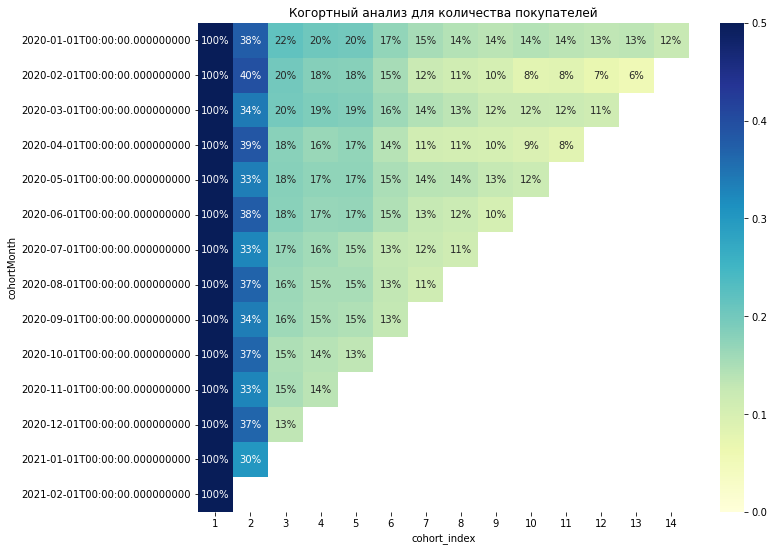

In [21]:
plt.figure(figsize = (11, 9))
plt.title('Когортный анализ для количества покупателей')
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'YlGnBu')
plt.show()

In [22]:
data2 = data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='price',
                      aggfunc='sum')

In [23]:
data2

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,662180.0,642990.0,608410.0,565650.0,547080.0,483840.0,455490.0,412040.0,407790.0,428040.0,382000.0,371740.0,360570.0,79310.0
2020-02-01,536310.0,594210.0,445590.0,450500.0,409640.0,366150.0,300350.0,278920.0,251840.0,212570.0,194800.0,156240.0,31080.0,NaN
2020-03-01,873000.0,797300.0,680220.0,666890.0,646610.0,546210.0,542030.0,486430.0,461720.0,465630.0,447040.0,90390.0,NaN,NaN
2020-04-01,648770.0,667480.0,526090.0,503450.0,482350.0,378620.0,354250.0,332740.0,329710.0,314460.0,61750.0,NaN,NaN,NaN
2020-05-01,992030.0,870090.0,737430.0,740850.0,699940.0,633220.0,584100.0,572410.0,568870.0,115380.0,NaN,NaN,NaN,NaN
2020-06-01,718980.0,759810.0,563430.0,559150.0,545300.0,472750.0,453890.0,411240.0,78310.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1106840.0,913300.0,739440.0,735260.0,661290.0,634590.0,604380.0,124890.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,844520.0,800350.0,607090.0,586730.0,603010.0,517030.0,94600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1164460.0,979070.0,784700.0,778600.0,710410.0,140880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
first_column_sum = data2.iloc[:,0]

In [25]:
retention2 = data2.div(first_column_sum, axis = 0)

In [26]:
retention2.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.97,0.92,0.85,0.83,0.73,0.69,0.62,0.62,0.65,0.58,0.56,0.54,0.12
2020-02-01,1.0,1.11,0.83,0.84,0.76,0.68,0.56,0.52,0.47,0.40,0.36,0.29,0.06,NaN
2020-03-01,1.0,0.91,0.78,0.76,0.74,0.63,0.62,0.56,0.53,0.53,0.51,0.10,NaN,NaN
2020-04-01,1.0,1.03,0.81,0.78,0.74,0.58,0.55,0.51,0.51,0.48,0.10,NaN,NaN,NaN
2020-05-01,1.0,0.88,0.74,0.75,0.71,0.64,0.59,0.58,0.57,0.12,NaN,NaN,NaN,NaN
2020-06-01,1.0,1.06,0.78,0.78,0.76,0.66,0.63,0.57,0.11,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.83,0.67,0.66,0.60,0.57,0.55,0.11,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.95,0.72,0.69,0.71,0.61,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.84,0.67,0.67,0.61,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


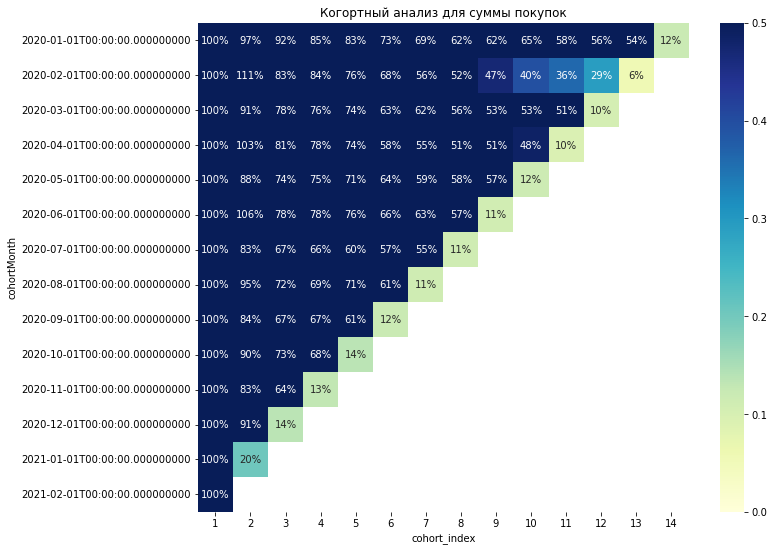

In [27]:
plt.figure(figsize = (11, 9))
plt.title('Когортный анализ для суммы покупок')
sns.heatmap(data = retention2,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'YlGnBu')
plt.show()

Анализ получившихся графиков показывает:
1.Поведение когорт очень похоже. Каких-то серьезных различий, например, сезонных, нет.
2.Количество покупателей в каждой из когорт максимально в  месяц совершения  первой покупки. 
3.Сильно упав во второй месяц, потом количество покупателей в когорте остается в целом стабильным, т.е. дальнейший отток не существенен. 
4.Исключение составляет лишь группа пользователей, пришедшая во второй месяц. В течение последних 5 периодов количество покупателей в этой группе снижалось интенсивней, чем в остальных группах, что соответственно привело к снижению суммы покупок в эти же периоды. Учитывая то, что сумма покупок в этой группе в начальные периоды была более высокой, что в других группах, а количество покупателей в эти же периоды не существенно не отличается от других групп, можно предположить, что основные покупки были выполнены в начальные периоды, а новые товары, которые могли бы заинтересовать покупателей второй группы, не появились.
5.Во многих когортах сумма, которую тратит покупатель во втором месяце, растет! Вероятно,это может объясняться ростом доверия нового клиента к магазину, уходом страхов после первой удачной покупки.
6.В последний месяц критично сократилось количество покупателей и сумма покупок. Скорее всего это связано с тем, что  последний месяц еще не завершился. В противном случае, есть вероятность того, что какой-то из критически важных каналов не был проплачен.
7.Вероятно, для более качественного анализа  стоило бы внимательнее исследовать долю клиентов ушедших за исследуемый период времени (Churn rate), а также среднюю прибыль на клиента за средний жизненный цикл (Customer Lifetime Value). 